In [1]:
from sklearn.linear_model import LinearRegression as LR
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.datasets import fetch_california_housing as fch #加利福尼亚房屋价值数据集
import pandas as pd

In [2]:
housevalue = fch() #会需要下载，大家可以提前运行试试看

In [4]:
housevalue.data

array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
          37.88      , -122.23      ],
       [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
          37.86      , -122.22      ],
       [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
          37.85      , -122.24      ],
       ...,
       [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
          39.43      , -121.22      ],
       [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
          39.43      , -121.32      ],
       [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
          39.37      , -121.24      ]])

In [5]:
X = pd.DataFrame(housevalue.data) #放入DataFrame中便于查看

In [7]:
X.shape

(20640, 8)

In [8]:
y = housevalue.target

In [10]:
y.min()

0.14999

In [11]:
y.max()

5.00001

In [12]:
y.shape

(20640,)

In [17]:
X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [14]:
housevalue.feature_names #特征名字

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

In [16]:
X.columns = housevalue.feature_names

In [ ]:
"""
MedInc：该街区住户的收入中位数
HouseAge：该街区房屋使用年代的中位数
AveRooms：该街区平均的房间数目
AveBedrms：该街区平均的卧室数目
Population：街区人口
AveOccup：平均入住率
Latitude：街区的纬度
Longitude：街区的经度
"""

In [18]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X,y,test_size=0.3,random_state=420)

In [25]:
Xtest.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,1.7656,42.0,4.144703,1.031008,1581.0,4.085271,33.96,-118.28
1,1.5281,29.0,5.095890,1.095890,1137.0,3.115068,39.29,-121.68
2,4.1750,14.0,5.604699,1.045965,2823.0,2.883555,37.14,-121.64
3,3.0278,52.0,5.172932,1.085714,1663.0,2.500752,37.78,-122.49
4,4.5000,36.0,4.940447,0.982630,1306.0,3.240695,33.95,-118.09


In [26]:
Xtrain.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,4.1776,35.0,4.425172,1.030683,5380.0,3.368817,37.48,-122.19
1,5.3261,38.0,6.267516,1.089172,429.0,2.732484,37.53,-122.30
2,1.9439,26.0,5.768977,1.141914,891.0,2.940594,36.02,-119.08
3,2.5000,22.0,4.916000,1.012000,733.0,2.932000,38.57,-121.31
4,3.8250,34.0,5.036765,1.098039,1134.0,2.779412,33.91,-118.35


In [21]:
#恢复索引
for i in [Xtrain, Xtest]:
    i.index = range(i.shape[0])

In [27]:
Xtrain.shape

(14448, 8)

In [ ]:
#如果希望进行数据标准化，还记得应该怎么做吗？
#先用训练集训练(fit)标准化的类，然后用训练好的类分别转化(transform)训练集和测试集

In [51]:
reg = LR().fit(Xtrain, Ytrain)

In [52]:
yhat = reg.predict(Xtest) #预测我们的yhat

In [53]:
yhat.min()

-0.6528439725035966

In [54]:
yhat.max()

7.146198214270875

In [55]:
reg.coef_ #w,系数向量

array([ 4.37358931e-01,  1.02112683e-02, -1.07807216e-01,  6.26433828e-01,
        5.21612535e-07, -3.34850965e-03, -4.13095938e-01, -4.26210954e-01])

In [58]:
Xtrain.columns

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude'],
      dtype='object')

In [59]:
[*zip(Xtrain.columns,reg.coef_)]

[('MedInc', 0.4373589305968403),
 ('HouseAge', 0.010211268294494038),
 ('AveRooms', -0.10780721617317715),
 ('AveBedrms', 0.6264338275363783),
 ('Population', 5.216125353178735e-07),
 ('AveOccup', -0.0033485096463336094),
 ('Latitude', -0.4130959378947711),
 ('Longitude', -0.4262109536208467)]

In [56]:
"""
MedInc：该街区住户的收入中位数
HouseAge：该街区房屋使用年代的中位数
AveRooms：该街区平均的房间数目
AveBedrms：该街区平均的卧室数目
Population：街区人口
AveOccup：平均入住率
Latitude：街区的纬度
Longitude：街区的经度
"""

'\nMedInc：该街区住户的收入中位数\nHouseAge：该街区房屋使用年代的中位数\nAveRooms：该街区平均的房间数目\nAveBedrms：该街区平均的卧室数目\nPopulation：街区人口\nAveOccup：平均入住率\nLatitude：街区的纬度\nLongitude：街区的经度\n'

In [57]:
reg.intercept_

-36.25689322920386

In [60]:
from sklearn.metrics import mean_squared_error as MSE
MSE(yhat,Ytest)

0.5309012639324571

In [61]:
Ytest.mean()

2.0819292877906976

In [62]:
y.max()

5.00001

In [63]:
y.min()

0.14999

In [64]:
cross_val_score(reg,X,y,cv=10,scoring="mean_squared_error")

ValueError: 'mean_squared_error' is not a valid scoring value. Use sorted(sklearn.metrics.SCORERS.keys()) to get valid options.

In [65]:
#为什么报错了？来试试看！
import sklearn
sorted(sklearn.metrics.SCORERS.keys())

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'brier_score_loss',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'mutual_info_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'normalized_mutual_info_score',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',
 'roc_auc',
 'v_measure_score']

In [69]:
cross_val_score(reg,X,y,cv=10,scoring="neg_mean_squared_error").mean()

-0.550952429695658

In [70]:
#调用R2
from sklearn.metrics import r2_score
r2_score(yhat,Ytest)

0.33806537615560006

In [71]:
r2 = reg.score(Xtest,Ytest)
r2

0.6043668160178817

In [72]:
r2_score(Ytest,yhat)

0.6043668160178817

In [73]:
#或者你也可以指定参数，就不必在意顺序了
r2_score(y_true = Ytest,y_pred = yhat)

0.6043668160178817

In [76]:
cross_val_score(reg,X,y,cv=10,scoring="r2").mean()

0.5110068610524564

In [77]:
import matplotlib.pyplot as plt
sorted(Ytest)

[0.14999,
 0.14999,
 0.225,
 0.325,
 0.35,
 0.375,
 0.388,
 0.392,
 0.394,
 0.396,
 0.4,
 0.404,
 0.409,
 0.41,
 0.43,
 0.435,
 0.437,
 0.439,
 0.44,
 0.44,
 0.444,
 0.446,
 0.45,
 0.45,
 0.45,
 0.45,
 0.455,
 0.455,
 0.455,
 0.456,
 0.462,
 0.463,
 0.471,
 0.475,
 0.478,
 0.478,
 0.481,
 0.481,
 0.483,
 0.483,
 0.485,
 0.485,
 0.488,
 0.489,
 0.49,
 0.492,
 0.494,
 0.494,
 0.494,
 0.495,
 0.496,
 0.5,
 0.5,
 0.504,
 0.505,
 0.506,
 0.506,
 0.508,
 0.508,
 0.51,
 0.516,
 0.519,
 0.52,
 0.521,
 0.523,
 0.523,
 0.525,
 0.525,
 0.525,
 0.525,
 0.525,
 0.527,
 0.527,
 0.528,
 0.529,
 0.53,
 0.531,
 0.532,
 0.534,
 0.535,
 0.535,
 0.535,
 0.538,
 0.538,
 0.539,
 0.539,
 0.539,
 0.541,
 0.541,
 0.542,
 0.542,
 0.542,
 0.543,
 0.543,
 0.544,
 0.544,
 0.546,
 0.547,
 0.55,
 0.55,
 0.55,
 0.55,
 0.55,
 0.55,
 0.55,
 0.55,
 0.551,
 0.553,
 0.553,
 0.553,
 0.554,
 0.554,
 0.554,
 0.555,
 0.556,
 0.556,
 0.557,
 0.558,
 0.558,
 0.559,
 0.559,
 0.559,
 0.559,
 0.56,
 0.56,
 0.562,
 0.566,
 0.567,
 

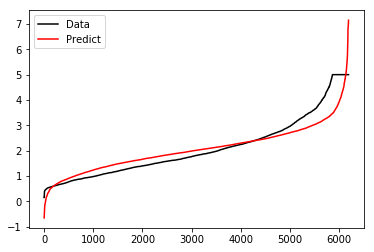

In [78]:
plt.plot(range(len(Ytest)),sorted(Ytest),c="black",label= "Data")
plt.plot(range(len(yhat)),sorted(yhat),c="red",label = "Predict")
plt.legend()
plt.show()

In [79]:
import numpy as np
rng = np.random.RandomState(42)
X = rng.randn(100, 80)
y = rng.randn(100)
cross_val_score(LR(), X, y, cv=5, scoring='r2')

array([-179.12952605,   -5.692624  ,  -15.61747513,  -78.68042858,
        -59.5311006 ])

In [157]:
import numpy as np
import pandas as pd
from sklearn.linear_model import Ridge, LinearRegression, Lasso
from sklearn.model_selection import train_test_split as TTS
from sklearn.datasets import fetch_california_housing as fch
import matplotlib.pyplot as plt

housevalue = fch()

X = pd.DataFrame(housevalue.data)
y = housevalue.target
X.columns = ["住户收入中位数","房屋使用年代中位数","平均房间数目"
            ,"平均卧室数目","街区人口","平均入住率","街区的纬度","街区的经度"]

In [130]:
X.head()

,住户收入中位数,房屋使用年代中位数,平均房间数目,平均卧室数目,街区人口,平均入住率,街区的纬度,街区的经度
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [159]:
Xtrain,Xtest,Ytrain,Ytest = TTS(X,y,test_size=0.3,random_state=420)

In [160]:
for i in [Xtrain,Xtest]:
    i.index = range(i.shape[0])

In [133]:
Xtrain.head()

,住户收入中位数,房屋使用年代中位数,平均房间数目,平均卧室数目,街区人口,平均入住率,街区的纬度,街区的经度
0,4.1776,35.0,4.425172,1.030683,5380.0,3.368817,37.48,-122.19
1,5.3261,38.0,6.267516,1.089172,429.0,2.732484,37.53,-122.30
2,1.9439,26.0,5.768977,1.141914,891.0,2.940594,36.02,-119.08
3,2.5000,22.0,4.916000,1.012000,733.0,2.932000,38.57,-121.31
4,3.8250,34.0,5.036765,1.098039,1134.0,2.779412,33.91,-118.35


In [162]:
#使用岭回归来进行建模
reg = Ridge(alpha=1).fit(Xtrain,Ytrain)
reg.score(Xtest,Ytest) #加利佛尼亚房屋价值数据集中应该不是共线性问题

0.6043610352312276

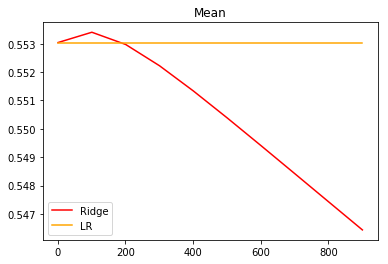

In [89]:
#交叉验证下，与线性回归相比，岭回归的结果如何变化？
alpharange = np.arange(1,1001,100)
ridge, lr = [], []
for alpha in alpharange:
    reg = Ridge(alpha=alpha)
    linear = LinearRegression()
    regs = cross_val_score(reg,X,y,cv=5,scoring = "r2").mean()
    linears = cross_val_score(linear,X,y,cv=5,scoring = "r2").mean()
    ridge.append(regs)
    lr.append(linears)
plt.plot(alpharange,ridge,color="red",label="Ridge")
plt.plot(alpharange,lr,color="orange",label="LR")
plt.title("Mean")
plt.legend()
plt.show()

In [139]:
#使用岭回归来进行建模
reg = Ridge(alpha=0).fit(Xtrain,Ytrain)
reg.score(Xtest,Ytest) #加利佛尼亚房屋价值数据集中应该不是共线性问题

0.6043668160178813

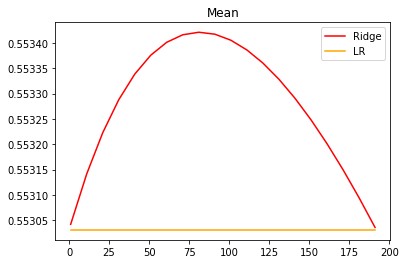

In [114]:
#细化一下学习曲线
alpharange = np.arange(1,201,10)
ridge, lr = [], []
for alpha in alpharange:
    reg = Ridge(alpha=alpha)
    linear = LinearRegression()
    regs = cross_val_score(reg,X,y,cv=5,scoring = "r2").mean()
    linears = cross_val_score(linear,X,y,cv=5,scoring = "r2").mean()
    ridge.append(regs)
    lr.append(linears)
plt.plot(alpharange,ridge,color="red",label="Ridge")
plt.plot(alpharange,lr,color="orange",label="LR")
plt.title("Mean")
plt.legend()
plt.show()

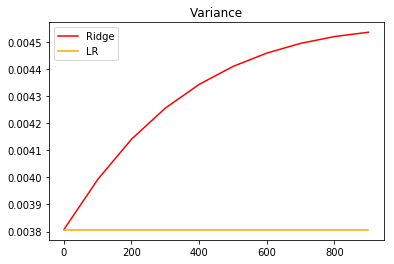

In [119]:
#模型方差如何变化？
alpharange = np.arange(1,1001,100)
ridge, lr = [], []
for alpha in alpharange:
    reg = Ridge(alpha=alpha)
    linear = LinearRegression()
    varR = cross_val_score(reg,X,y,cv=5,scoring="r2").var()
    varLR = cross_val_score(linear,X,y,cv=5,scoring="r2").var()
    ridge.append(varR)
    lr.append(varLR)
plt.plot(alpharange,ridge,color="red",label="Ridge")
plt.plot(alpharange,lr,color="orange",label="LR")
plt.title("Variance")
plt.legend()
plt.show()

In [163]:
from sklearn.datasets import load_boston
from sklearn.model_selection import cross_val_score

X = load_boston().data
y = load_boston().target

Xtrain,Xtest,Ytrain,Ytest = TTS(X,y,test_size=0.3,random_state=420)

In [164]:
X.shape

(506, 13)

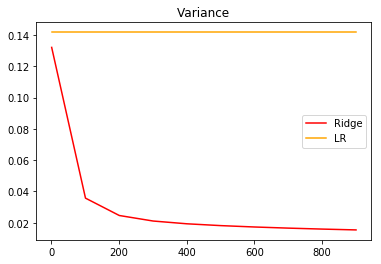

In [165]:
#先查看方差的变化
alpharange = np.arange(1,1001,100)
ridge, lr = [], []
for alpha in alpharange:
    reg = Ridge(alpha=alpha)
    linear = LinearRegression()
    varR = cross_val_score(reg,X,y,cv=5,scoring="r2").var()
    varLR = cross_val_score(linear,X,y,cv=5,scoring="r2").var()
    ridge.append(varR)
    lr.append(varLR)
plt.plot(alpharange,ridge,color="red",label="Ridge")
plt.plot(alpharange,lr,color="orange",label="LR")
plt.title("Variance")
plt.legend()
plt.show()

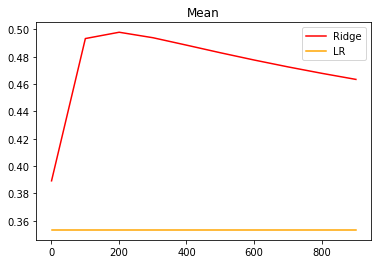

In [166]:
#查看R2的变化
alpharange = np.arange(1,1001,100)
ridge, lr = [], []
for alpha in alpharange:
    reg = Ridge(alpha=alpha)
    linear = LinearRegression()
    regs = cross_val_score(reg,X,y,cv=5,scoring = "r2").mean()
    linears = cross_val_score(linear,X,y,cv=5,scoring = "r2").mean()
    ridge.append(regs)
    lr.append(linears)
plt.plot(alpharange,ridge,color="red",label="Ridge")
plt.plot(alpharange,lr,color="orange",label="LR")
plt.title("Mean")
plt.legend()
plt.show()

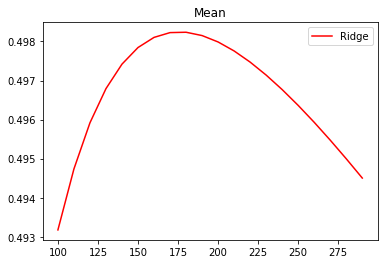

In [168]:
#细化学习曲线
alpharange = np.arange(100,300,10)
ridge, lr = [], []
for alpha in alpharange:
    reg = Ridge(alpha=alpha)
    #linear = LinearRegression()
    regs = cross_val_score(reg,X,y,cv=5,scoring = "r2").mean()
    #linears = cross_val_score(linear,X,y,cv=5,scoring = "r2").mean()
    ridge.append(regs)
    lr.append(linears)
plt.plot(alpharange,ridge,color="red",label="Ridge")
#plt.plot(alpharange,lr,color="orange",label="LR")
plt.title("Mean")
plt.legend()
plt.show()

In [169]:
import numpy as np
import pandas as pd
from sklearn.linear_model import RidgeCV, LinearRegression
from sklearn.model_selection import train_test_split as TTS
from sklearn.datasets import fetch_california_housing as fch
import matplotlib.pyplot as plt

housevalue = fch()

X = pd.DataFrame(housevalue.data)
y = housevalue.target
X.columns = ["住户收入中位数","房屋使用年代中位数","平均房间数目"
            ,"平均卧室数目","街区人口","平均入住率","街区的纬度","街区的经度"]

In [192]:
Ridge_ = RidgeCV(alphas=np.arange(1,1001,100)
                 #,scoring="neg_mean_squared_error"
                 ,store_cv_values=True
                 #,cv=5
                ).fit(X, y)

In [193]:
#无关交叉验证的岭回归结果
Ridge_.score(X,y)

0.6060251767338429

In [194]:
#调用所有交叉验证的结果
Ridge_.cv_values_

array([[0.1557472 , 0.16301246, 0.16892723, ..., 0.18881663, 0.19182353,
        0.19466385],
       [0.15334566, 0.13922075, 0.12849014, ..., 0.09744906, 0.09344092,
        0.08981868],
       [0.02429857, 0.03043271, 0.03543001, ..., 0.04971514, 0.05126165,
        0.05253834],
       ...,
       [0.56545783, 0.5454654 , 0.52655917, ..., 0.44532597, 0.43130136,
        0.41790336],
       [0.27883123, 0.2692305 , 0.25944481, ..., 0.21328675, 0.20497018,
        0.19698274],
       [0.14313527, 0.13967826, 0.13511341, ..., 0.1078647 , 0.10251737,
        0.0973334 ]])

In [195]:
#进行平均后可以查看每个正则化系数取值下的交叉验证结果
Ridge_.cv_values_.mean(axis=0)

array([0.52823795, 0.52787439, 0.52807763, 0.52855759, 0.52917958,
       0.52987689, 0.53061486, 0.53137481, 0.53214638, 0.53292369])

In [191]:
#查看被选择出来的最佳正则化系数
Ridge_.alpha_

101

In [196]:
import numpy as np
import pandas as pd
from sklearn.linear_model import Ridge, LinearRegression, Lasso
from sklearn.model_selection import train_test_split as TTS
from sklearn.datasets import fetch_california_housing as fch
import matplotlib.pyplot as plt

housevalue = fch()

X = pd.DataFrame(housevalue.data)
y = housevalue.target
X.columns = ["住户收入中位数","房屋使用年代中位数","平均房间数目"
            ,"平均卧室数目","街区人口","平均入住率","街区的纬度","街区的经度"]

X.head()

,住户收入中位数,房屋使用年代中位数,平均房间数目,平均卧室数目,街区人口,平均入住率,街区的纬度,街区的经度
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [197]:
Xtrain,Xtest,Ytrain,Ytest = TTS(X,y,test_size=0.3,random_state=420)

In [198]:
for i in [Xtrain,Xtest]:
    i.index = range(i.shape[0])

In [199]:
#线性回归进行拟合
reg = LinearRegression().fit(Xtrain,Ytrain)
(reg.coef_*100).tolist()

[43.73589305968403,
 1.0211268294494038,
 -10.780721617317715,
 62.64338275363783,
 5.216125353178735e-05,
 -0.33485096463336095,
 -41.30959378947711,
 -42.621095362084674]

In [203]:
#岭回归进行拟合
Ridge_ = Ridge(alpha=0).fit(Xtrain,Ytrain)
(Ridge_.coef_*100).tolist()

[43.735893059684045,
 1.0211268294494151,
 -10.780721617317626,
 62.64338275363741,
 5.2161253532713044e-05,
 -0.3348509646333588,
 -41.3095937894767,
 -42.62109536208427]

In [201]:
#Lasso进行拟合
lasso_ = Lasso(alpha=0).fit(Xtrain,Ytrain)
(lasso_.coef_*100).tolist()

C:\Python\lib\site-packages\ipykernel_launcher.py:2: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  
C:\Python\lib\site-packages\sklearn\linear_model\coordinate_descent.py:478: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
C:\Python\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[43.735893059684024,
 1.0211268294494056,
 -10.78072161731769,
 62.64338275363792,
 5.2161253532654165e-05,
 -0.33485096463335706,
 -41.3095937894772,
 -42.62109536208478]

In [213]:
#岭回归进行拟合
Ridge_ = Ridge(alpha=0.1).fit(Xtrain,Ytrain)
(Ridge_.coef_*100).tolist()

[43.73453480786963,
 1.0211508518425705,
 -10.778109335481922,
 62.62978997580449,
 5.225552031939166e-05,
 -0.33484783635443754,
 -41.309370065387334,
 -42.62068050768429]

In [214]:
#Lasso进行拟合
lasso_ = Lasso(alpha=0.1).fit(Xtrain,Ytrain)
(lasso_.coef_*100).tolist()

[39.08851438329683,
 1.6054695654279871,
 -0.0,
 0.0,
 0.0023777014839091357,
 -0.3050186895638113,
 -10.771509301655533,
 -9.294344477958068]

In [ ]:
[43.73589305968403,
 1.0211268294494038,
 -10.780721617317715,
 62.64338275363783,
 5.216125353178735e-05,
 -0.33485096463336095,
 -41.30959378947711,
 -42.621095362084674]

In [220]:
#加大正则项系数，观察模型的系数发生了什么变化
Ridge_ = Ridge(alpha=10**10).fit(Xtrain,Ytrain)
(Ridge_.coef_*100).tolist()

[0.00021838533330206371,
 0.00021344956264503437,
 6.213673042878624e-05,
 -3.828084920732734e-06,
 -0.0014984087286952859,
 -4.175243714653836e-05,
 -5.29506119447496e-05,
 -1.3268982521957727e-05]

In [217]:
lasso_ = Lasso(alpha=10**4).fit(Xtrain,Ytrain)
(lasso_.coef_*100).tolist()

[0.0, 0.0, 0.0, -0.0, -0.0, -0.0, -0.0, -0.0]

In [218]:
#看来10**4对于Lasso来说是一个过于大的取值
lasso_ = Lasso(alpha=1).fit(Xtrain,Ytrain)
(lasso_.coef_*100).tolist()

[14.581141247629423,
 0.6209347344423876,
 0.0,
 -0.0,
 -0.00028065986329009983,
 -0.0,
 -0.0,
 -0.0]

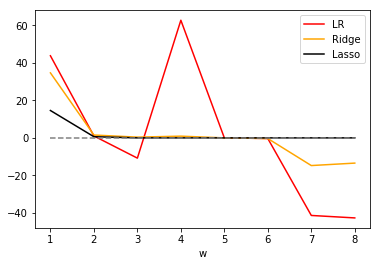

In [219]:
#将系数进行绘图
plt.plot(range(1,9),(reg.coef_*100).tolist(),color="red",label="LR")
plt.plot(range(1,9),(Ridge_.coef_*100).tolist(),color="orange",label="Ridge")
plt.plot(range(1,9),(lasso_.coef_*100).tolist(),color="k",label="Lasso")
plt.plot(range(1,9),[0]*8,color="grey",linestyle="--")
plt.xlabel('w') #横坐标是每一个特征所对应的系数
plt.legend()
plt.show()

In [288]:
from sklearn.linear_model import LassoCV

#自己建立Lasso进行alpha选择的范围
alpharange = np.logspace(-10, -2, 200,base=10)

#其实是形成10为底的指数函数
#10**(-10)到10**(-2)次方

alpharange.shape

Xtrain.head()

lasso_ = LassoCV(alphas=alpharange #自行输入的alpha的取值范围
                ,cv=5 #交叉验证的折数
                ).fit(Xtrain, Ytrain)

#查看被选择出来的最佳正则化系数
lasso_.alpha_

#调用所有交叉验证的结果
lasso_.mse_path_

lasso_.mse_path_.shape #返回每个alpha下的五折交叉验证结果

lasso_.mse_path_.mean(axis=1) #有注意到在岭回归中我们的轴向是axis=0吗？

#在岭回归当中，我们是留一验证，因此我们的交叉验证结果返回的是，每一个样本在每个alpha下的交叉验证结果
#因此我们要求每个alpha下的交叉验证均值，就是axis=0，跨行求均值
#而在这里，我们返回的是，每一个alpha取值下，每一折交叉验证的结果
#因此我们要求每个alpha下的交叉验证均值，就是axis=1，跨列求均值

#最佳正则化系数下获得的模型的系数结果
lasso_.coef_

lasso_.score(Xtest,Ytest)

#与线性回归相比如何？
reg = LinearRegression().fit(Xtrain,Ytrain)
reg.score(Xtest,Ytest)

#使用lassoCV自带的正则化路径长度和路径中的alpha个数来自动建立alpha选择的范围
ls_ = LassoCV(eps=0.00001
              ,n_alphas=300
              ,cv=5
                ).fit(Xtrain, Ytrain)

ls_.alpha_

ls_.alphas_ #查看所有自动生成的alpha取值

ls_.alphas_.shape

ls_.score(Xtest,Ytest)

ls_.coef_

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

In [24]:
rnd = np.random.RandomState(42) #设置随机数种子
X = rnd.uniform(-3, 3, size=100) #random.uniform，从输入的任意两个整数中取出size个随机数

In [25]:
X #作为我的横坐标

array([-0.75275929,  2.70428584,  1.39196365,  0.59195091, -2.06388816,
       -2.06403288, -2.65149833,  2.19705687,  0.60669007,  1.24843547,
       -2.87649303,  2.81945911,  1.99465584, -1.72596534, -1.9090502 ,
       -1.89957294, -1.17454654,  0.14853859, -0.40832989, -1.25262516,
        0.67111737, -2.16303684, -1.24713211, -0.80182894, -0.26358009,
        1.71105577, -1.80195731,  0.08540663,  0.55448741, -2.72129752,
        0.64526911, -1.97685526, -2.60969044,  2.69331322,  2.7937922 ,
        1.85038409, -1.17231738, -2.41396732,  1.10539816, -0.35908504,
       -2.26777059, -0.02893854, -2.79366887,  2.45592241, -1.44732011,
        0.97513371, -1.12973354,  0.12040813,  0.28026168, -1.89087327,
        2.81750777,  1.65079694,  2.63699365,  2.3689641 ,  0.58739987,
        2.53124541, -2.46904499, -1.82410283, -2.72863627, -1.04801802,
       -0.66793626, -1.37190581,  1.97242505, -0.85948004, -1.31439294,
        0.2561765 , -2.15445465,  1.81318188, -2.55269614,  2.92

In [26]:
#生成y的思路：先使用NumPy中的函数生成一个sin函数图像，然后再人为添加噪音
y = np.sin(X) + rnd.normal(size=len(X)) / 3 #random.normal，生成size个服从正态分布的随机数

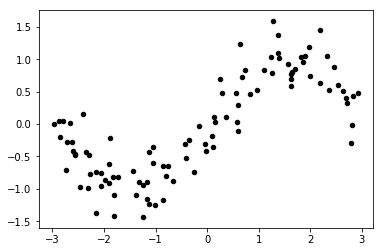

In [27]:
#使用散点图观察建立的数据集是什么样子
plt.scatter(X, y,marker='o',c='k',s=20)
plt.show()

In [28]:
#为后续建模做准备：sklearn只接受二维以上数组作为特征矩阵的输入
X.shape

(100,)

In [29]:
X = X.reshape(-1, 1)

In [30]:
X.shape

(100, 1)

In [31]:
#使用原始数据进行建模
LinearR = LinearRegression().fit(X, y)
TreeR = DecisionTreeRegressor(random_state=0).fit(X, y)

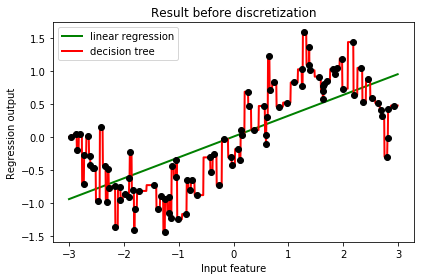

In [32]:
#放置画布
fig, ax1 = plt.subplots(1)

#创建测试数据：一系列分布在横坐标上的点
line = np.linspace(-3, 3, 1000, endpoint=False).reshape(-1, 1)

#将测试数据带入predict接口，获得模型的拟合效果并进行绘制
ax1.plot(line, LinearR.predict(line), linewidth=2, color='green',
         label="linear regression")
ax1.plot(line, TreeR.predict(line), linewidth=2, color='red',
         label="decision tree")

#将原数据上的拟合绘制在图像上
ax1.plot(X[:, 0], y, 'o', c='k')

#其他图形选项
ax1.legend(loc="best")
ax1.set_ylabel("Regression output")
ax1.set_xlabel("Input feature")
ax1.set_title("Result before discretization")
plt.tight_layout()
plt.show()

#从这个图像来看，可以得出什么结果？

In [42]:
from sklearn.preprocessing import KBinsDiscretizer

#将数据分箱
enc = KBinsDiscretizer(n_bins=10 #分几类？
                       ,encode="onehot") #ordinal
X_binned = enc.fit_transform(X)
#encode模式"onehot"：使用做哑变量方式做离散化
#之后返回一个稀疏矩阵(m,n_bins)，每一列是一个分好的类别
#对每一个样本而言，它包含的分类（箱子）中它表示为1，其余分类中它表示为0

X.shape

X_binned

#使用pandas打开稀疏矩阵
import pandas as pd
pd.DataFrame(X_binned.toarray()).head()

#我们将使用分箱后的数据来训练模型，在sklearn中，测试集和训练集的结构必须保持一致，否则报错
LinearR_ = LinearRegression().fit(X_binned, y)

LinearR_.predict(line) #line作为测试集

line.shape #测试

X_binned.shape #训练

#因此我们需要创建分箱后的测试集：按照已经建好的分箱模型将line分箱
line_binned = enc.transform(line)

line_binned.shape #分箱后的数据是无法进行绘图的

line_binned

LinearR_.predict(line_binned).shape

In [59]:
enc.bin_edges_[0] #分出的箱子的上限和下限

array([-2.9668673 , -2.55299973, -2.0639171 , -1.3945301 , -1.02797432,
       -0.21514527,  0.44239288,  1.14612193,  1.63693428,  2.32784522,
        2.92132162])

[0.0, 1.0]

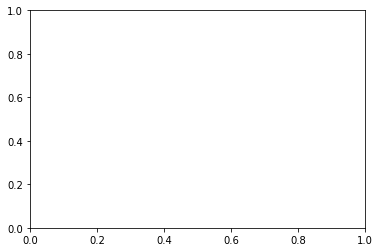

In [62]:
[*plt.gca().get_ylim()]

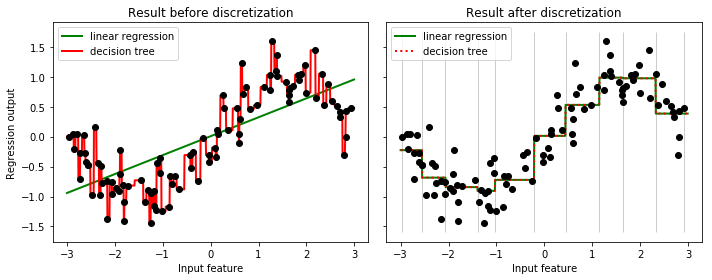

In [57]:
#准备数据
enc = KBinsDiscretizer(n_bins=10,encode="onehot")
X_binned = enc.fit_transform(X)
line_binned = enc.transform(line)

#将两张图像绘制在一起，布置画布
fig, (ax1, ax2) = plt.subplots(ncols=2
                               , sharey=True #让两张图共享y轴上的刻度
                               , figsize=(10, 4))

#在图1中布置在原始数据上建模的结果
ax1.plot(line, LinearR.predict(line), linewidth=2, color='green',
         label="linear regression")
ax1.plot(line, TreeR.predict(line), linewidth=2, color='red',
         label="decision tree")
ax1.plot(X[:, 0], y, 'o', c='k')
ax1.legend(loc="best")
ax1.set_ylabel("Regression output")
ax1.set_xlabel("Input feature")
ax1.set_title("Result before discretization")

#使用分箱数据进行建模
LinearR_ = LinearRegression().fit(X_binned, y)
TreeR_ = DecisionTreeRegressor(random_state=0).fit(X_binned, y)

#进行预测，在图2中布置在分箱数据上进行预测的结果
ax2.plot(line #横坐标
         , LinearR_.predict(line_binned) #分箱后的特征矩阵的结果
         , linewidth=2
         , color='green'
         , linestyle='-'
         , label='linear regression')

ax2.plot(line, TreeR_.predict(line_binned), linewidth=2, color='red',
         linestyle=':', label='decision tree')

#绘制和箱宽一致的竖线
ax2.vlines(enc.bin_edges_[0] #x轴
           , *plt.gca().get_ylim() #y轴的上限和下限
           , linewidth=1
           , alpha=.2)

#将原始数据分布放置在图像上
ax2.plot(X[:, 0], y, 'o', c='k')

#其他绘图设定
ax2.legend(loc="best")
ax2.set_xlabel("Input feature")
ax2.set_title("Result after discretization")
plt.tight_layout()
plt.show()

0.9590978882491229


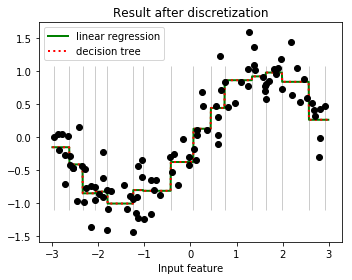

In [75]:
enc = KBinsDiscretizer(n_bins=15,encode="onehot")
X_binned = enc.fit_transform(X)
line_binned = enc.transform(line)

fig, ax2 = plt.subplots(1,figsize=(5,4))

LinearR_ = LinearRegression().fit(X_binned, y)
print(LinearR_.score(line_binned,np.sin(line)))
TreeR_ = DecisionTreeRegressor(random_state=0).fit(X_binned, y)

ax2.plot(line #横坐标
         , LinearR_.predict(line_binned) #分箱后的特征矩阵的结果
         , linewidth=2
         , color='green'
         , linestyle='-'
         , label='linear regression')
ax2.plot(line, TreeR_.predict(line_binned), linewidth=2, color='red',
         linestyle=':', label='decision tree')
ax2.vlines(enc.bin_edges_[0], *plt.gca().get_ylim(), linewidth=1, alpha=.2)
ax2.plot(X[:, 0], y, 'o', c='k')
ax2.legend(loc="best")
ax2.set_xlabel("Input feature")
ax2.set_title("Result after discretization")
plt.tight_layout()
plt.show()

In [68]:
#怎样选取最优的箱子?
from sklearn.model_selection import cross_val_score as CVS
import numpy as np

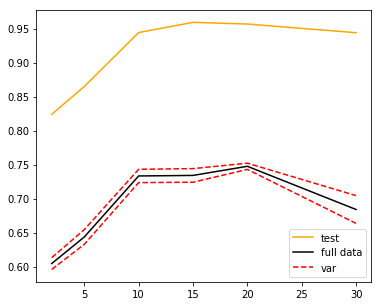

In [73]:
pred,score,var = [], [], []
binsrange = [2,5,10,15,20,30]
for i in binsrange:
    #实例化分箱类
    enc = KBinsDiscretizer(n_bins=i,encode="onehot")
    #转换数据
    X_binned = enc.fit_transform(X)
    line_binned = enc.transform(line)
    #建立模型
    LinearR_ = LinearRegression()
    #全数据集上的交叉验证
    cvresult = CVS(LinearR_,X_binned,y,cv=5)
    score.append(cvresult.mean())
    var.append(cvresult.var())
    #测试数据集上的打分结果
    pred.append(LinearR_.fit(X_binned,y).score(line_binned,np.sin(line)))
#绘制图像
plt.figure(figsize=(6,5))
plt.plot(binsrange,pred,c="orange",label="test")
plt.plot(binsrange,score,c="k",label="full data")
plt.plot(binsrange,score+np.array(var)*0.5,c="red",linestyle="--",label = "var")
plt.plot(binsrange,score-np.array(var)*0.5,c="red",linestyle="--")
plt.legend()
plt.show()

In [76]:
from sklearn.preprocessing import PolynomialFeatures
import numpy as np

In [125]:
#如果原始数据是一维的
X = np.arange(1,4).reshape(-1,1)
X

array([[1],
       [2],
       [3]])

In [80]:
#二次多项式，参数degree控制多项式的次方
poly = PolynomialFeatures(degree=2)

In [81]:
#接口transform直接调用
X_ = poly.fit_transform(X)

In [82]:
X_

array([[1., 1., 1.],
       [1., 2., 4.],
       [1., 3., 9.]])

In [83]:
X_.shape

(3, 3)

In [84]:
#三次多项式
PolynomialFeatures(degree=3).fit_transform(X)

array([[ 1.,  1.,  1.,  1.],
       [ 1.,  2.,  4.,  8.],
       [ 1.,  3.,  9., 27.]])

In [126]:
#三次多项式，不带与截距项相乘的x0
PolynomialFeatures(degree=3,include_bias=False).fit_transform(X)

array([[ 1.,  1.,  1.],
       [ 2.,  4.,  8.],
       [ 3.,  9., 27.]])

In [128]:
#为什么我们会希望不生成与截距相乘的x0呢？
#对于多项式回归来说，我们已经为线性回归准备好了x0，但是线性回归并不知道
xxx = PolynomialFeatures(degree=3).fit_transform(X)

In [127]:
xxx.shape

(3, 4)

In [129]:
rnd = np.random.RandomState(42) #设置随机数种子
y = rnd.randn(3)

y

array([ 0.49671415, -0.1382643 ,  0.64768854])

In [130]:
#生成了多少个系数？
LinearRegression().fit(xxx,y).coef_

array([ 1.36002321e-15, -3.51045297e-01, -6.06987134e-01,  2.19575463e-01])

In [131]:
#查看截距
LinearRegression().fit(xxx,y).intercept_

1.2351711202036895

In [133]:
#发现问题了吗？线性回归并没有把多项式生成的x0当作是截距项
#所以我们可以选择：关闭多项式回归中的include_bias
#也可以选择：关闭线性回归中的fit_intercept

#生成了多少个系数？
LinearRegression(fit_intercept=False).fit(xxx,y).coef_

array([ 1.00596411,  0.06916756, -0.83619415,  0.25777663])

In [134]:
#查看截距
LinearRegression(fit_intercept=False).fit(xxx,y).intercept_

0.0

In [135]:
X = np.arange(6).reshape(3, 2)
X

array([[0, 1],
       [2, 3],
       [4, 5]])

In [136]:
#尝试二次多项式
PolynomialFeatures(degree=2).fit_transform(X)

array([[ 1.,  0.,  1.,  0.,  0.,  1.],
       [ 1.,  2.,  3.,  4.,  6.,  9.],
       [ 1.,  4.,  5., 16., 20., 25.]])

In [137]:
#尝试三次多项式
PolynomialFeatures(degree=3).fit_transform(X)

array([[  1.,   0.,   1.,   0.,   0.,   1.,   0.,   0.,   0.,   1.],
       [  1.,   2.,   3.,   4.,   6.,   9.,   8.,  12.,  18.,  27.],
       [  1.,   4.,   5.,  16.,  20.,  25.,  64.,  80., 100., 125.]])

In [138]:
PolynomialFeatures(degree=2).fit_transform(X)

array([[ 1.,  0.,  1.,  0.,  0.,  1.],
       [ 1.,  2.,  3.,  4.,  6.,  9.],
       [ 1.,  4.,  5., 16., 20., 25.]])

In [139]:
PolynomialFeatures(degree=2,interaction_only=True).fit_transform(X)
#对比之下，当interaction_only为True的时候，只生成交互项

array([[ 1.,  0.,  1.,  0.],
       [ 1.,  2.,  3.,  6.],
       [ 1.,  4.,  5., 20.]])

In [144]:
#更高维度的原始特征矩阵
X = np.arange(20).reshape(2, 10)
X

array([[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14, 15, 16, 17, 18, 19]])

In [146]:
PolynomialFeatures(degree=2).fit_transform(X).shape

(2, 66)

In [147]:
PolynomialFeatures(degree=3).fit_transform(X).shape

(2, 286)

In [148]:
X_ = PolynomialFeatures(degree=20).fit_transform(X)

X_.shape

(2, 30045015)

In [159]:
from sklearn.preprocessing import PolynomialFeatures as PF
from sklearn.linear_model import LinearRegression
import numpy as np

rnd = np.random.RandomState(42) #设置随机数种子
X = rnd.uniform(-3, 3, size=100)
y = np.sin(X) + rnd.normal(size=len(X)) / 3

#将X升维，准备好放入sklearn中
X = X.reshape(-1,1)

#创建测试数据，均匀分布在训练集X的取值范围内的一千个点
line = np.linspace(-3, 3, 1000, endpoint=False).reshape(-1, 1)

In [160]:
#原始特征矩阵的拟合结果
LinearR = LinearRegression().fit(X, y)
#对训练数据的拟合
LinearR.score(X,y)

0.5361526059318595

In [161]:
#对测试数据的拟合
LinearR.score(line,np.sin(line))

0.6800102369793312

In [164]:
#多项式拟合，设定高次项
d=5

#进行高次项转换
poly = PF(degree=d)
X_ = poly.fit_transform(X)
line_ = poly.transform(line)

#训练数据的拟合
LinearR_ = LinearRegression().fit(X_, y)
LinearR_.score(X_,y)

0.8561679370344799

In [165]:
#测试数据的拟合
LinearR_.score(line_,np.sin(line))

0.9868904451787983

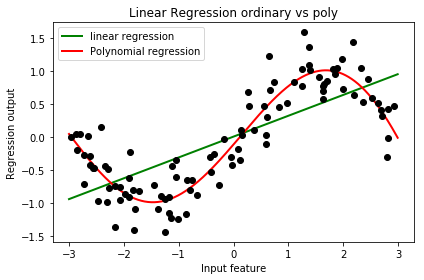

In [171]:
import matplotlib.pyplot as plt

d=5
#和上面展示一致的建模流程
LinearR = LinearRegression().fit(X, y)
X_ = PF(degree=d).fit_transform(X)
LinearR_ = LinearRegression().fit(X_, y)
line = np.linspace(-3, 3, 1000, endpoint=False).reshape(-1, 1)
line_ = PF(degree=d).fit_transform(line)

#放置画布
fig, ax1 = plt.subplots(1)

#将测试数据带入predict接口，获得模型的拟合效果并进行绘制
ax1.plot(line, LinearR.predict(line), linewidth=2, color='green'
         ,label="linear regression")
ax1.plot(line, LinearR_.predict(line_), linewidth=2, color='red'
         ,label="Polynomial regression")

#将原数据上的拟合绘制在图像上
ax1.plot(X[:, 0], y, 'o', c='k')

#其他图形选项
ax1.legend(loc="best")
ax1.set_ylabel("Regression output")
ax1.set_xlabel("Input feature")
ax1.set_title("Linear Regression ordinary vs poly")
plt.tight_layout()
plt.show()

#来一起鼓掌，感叹多项式回归的神奇

#随后可以试试看较低和较高的次方会发生什么变化
#d=2
#d=20

In [51]:
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

X = np.arange(9).reshape(3, 3)
X

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

In [52]:
poly = PolynomialFeatures(degree=5).fit(X)

In [53]:
#重要接口get_feature_names
poly.get_feature_names()

['1',
 'x0',
 'x1',
 'x2',
 'x0^2',
 'x0 x1',
 'x0 x2',
 'x1^2',
 'x1 x2',
 'x2^2',
 'x0^3',
 'x0^2 x1',
 'x0^2 x2',
 'x0 x1^2',
 'x0 x1 x2',
 'x0 x2^2',
 'x1^3',
 'x1^2 x2',
 'x1 x2^2',
 'x2^3',
 'x0^4',
 'x0^3 x1',
 'x0^3 x2',
 'x0^2 x1^2',
 'x0^2 x1 x2',
 'x0^2 x2^2',
 'x0 x1^3',
 'x0 x1^2 x2',
 'x0 x1 x2^2',
 'x0 x2^3',
 'x1^4',
 'x1^3 x2',
 'x1^2 x2^2',
 'x1 x2^3',
 'x2^4',
 'x0^5',
 'x0^4 x1',
 'x0^4 x2',
 'x0^3 x1^2',
 'x0^3 x1 x2',
 'x0^3 x2^2',
 'x0^2 x1^3',
 'x0^2 x1^2 x2',
 'x0^2 x1 x2^2',
 'x0^2 x2^3',
 'x0 x1^4',
 'x0 x1^3 x2',
 'x0 x1^2 x2^2',
 'x0 x1 x2^3',
 'x0 x2^4',
 'x1^5',
 'x1^4 x2',
 'x1^3 x2^2',
 'x1^2 x2^3',
 'x1 x2^4',
 'x2^5']

In [54]:
from sklearn.datasets import fetch_california_housing as fch
import pandas as pd

housevalue = fch()
X = pd.DataFrame(housevalue.data)
y = housevalue.target
housevalue.feature_names

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

In [55]:
X.columns = ["住户收入中位数","房屋使用年代中位数","平均房间数目"
            ,"平均卧室数目","街区人口","平均入住率","街区的纬度","街区的经度"]

In [56]:
X.head()

,住户收入中位数,房屋使用年代中位数,平均房间数目,平均卧室数目,街区人口,平均入住率,街区的纬度,街区的经度
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [76]:
poly = PolynomialFeatures(degree=4).fit(X,y)

In [77]:
poly.get_feature_names(X.columns)

['1',
 '住户收入中位数',
 '房屋使用年代中位数',
 '平均房间数目',
 '平均卧室数目',
 '街区人口',
 '平均入住率',
 '街区的纬度',
 '街区的经度',
 '住户收入中位数^2',
 '住户收入中位数 房屋使用年代中位数',
 '住户收入中位数 平均房间数目',
 '住户收入中位数 平均卧室数目',
 '住户收入中位数 街区人口',
 '住户收入中位数 平均入住率',
 '住户收入中位数 街区的纬度',
 '住户收入中位数 街区的经度',
 '房屋使用年代中位数^2',
 '房屋使用年代中位数 平均房间数目',
 '房屋使用年代中位数 平均卧室数目',
 '房屋使用年代中位数 街区人口',
 '房屋使用年代中位数 平均入住率',
 '房屋使用年代中位数 街区的纬度',
 '房屋使用年代中位数 街区的经度',
 '平均房间数目^2',
 '平均房间数目 平均卧室数目',
 '平均房间数目 街区人口',
 '平均房间数目 平均入住率',
 '平均房间数目 街区的纬度',
 '平均房间数目 街区的经度',
 '平均卧室数目^2',
 '平均卧室数目 街区人口',
 '平均卧室数目 平均入住率',
 '平均卧室数目 街区的纬度',
 '平均卧室数目 街区的经度',
 '街区人口^2',
 '街区人口 平均入住率',
 '街区人口 街区的纬度',
 '街区人口 街区的经度',
 '平均入住率^2',
 '平均入住率 街区的纬度',
 '平均入住率 街区的经度',
 '街区的纬度^2',
 '街区的纬度 街区的经度',
 '街区的经度^2',
 '住户收入中位数^3',
 '住户收入中位数^2 房屋使用年代中位数',
 '住户收入中位数^2 平均房间数目',
 '住户收入中位数^2 平均卧室数目',
 '住户收入中位数^2 街区人口',
 '住户收入中位数^2 平均入住率',
 '住户收入中位数^2 街区的纬度',
 '住户收入中位数^2 街区的经度',
 '住户收入中位数 房屋使用年代中位数^2',
 '住户收入中位数 房屋使用年代中位数 平均房间数目',
 '住户收入中位数 房屋使用年代中位数 平均卧室数目',
 '住户收入中位数 房屋使用年代中位数 街区人口',
 '住户收入中位数 房屋使用年代中位数 平均入住率',
 '住户收入中位数 房

In [78]:
X_ = poly.transform(X)

In [79]:
#在这之后，我们依然可以直接建立模型，然后使用线性回归的coef_属性来查看什么特征对标签的影响最大
reg = LinearRegression().fit(X_,y)

In [80]:
coef = reg.coef_

In [81]:
coef

array([ 3.10808260e-04, -2.29593275e-05, -1.86555823e-07,  3.14540980e-09,
       -1.00201271e-07, -5.19948347e-05,  7.14311031e-08,  4.16703056e-07,
        5.43864807e-08, -9.52364163e-06, -1.16565513e-05, -1.93026352e-05,
       -2.36028415e-06, -5.93269415e-05,  2.41120302e-06, -1.05762608e-06,
        1.14243699e-05, -8.09650966e-06,  1.03024176e-05, -6.82691390e-06,
       -7.58175217e-04,  3.55009488e-05,  1.25185532e-05,  2.81618206e-05,
       -1.11578705e-05,  3.64080725e-06, -1.12579472e-04, -4.95652189e-06,
        1.69265053e-06, -5.08685341e-06,  1.65736112e-06, -2.78832974e-05,
       -9.44920031e-07, -1.31392851e-06,  8.27152876e-06,  2.43950726e-05,
       -4.46846779e-05, -7.03350953e-04,  2.08525543e-03, -7.72843579e-06,
       -9.85983811e-07, -5.59809918e-06, -3.99871884e-06, -2.50108280e-05,
       -6.11054901e-06, -8.42321654e-05, -1.51762683e-04, -9.64464932e-05,
       -1.19005828e-05,  6.28965193e-04,  3.59736646e-05, -1.78734368e-04,
        5.61576225e-04, -

In [67]:
[*zip(poly.get_feature_names(X.columns),reg.coef_)]

[('1', 5.9195481409833284e-08),
 ('住户收入中位数', -11.243025601117052),
 ('房屋使用年代中位数', -0.8488985550865555),
 ('平均房间数目', 6.4410594008838045),
 ('平均卧室数目', -31.591330845036552),
 ('街区人口', 0.000406090678218692),
 ('平均入住率', 1.003862325169533),
 ('街区的纬度', 8.705681915719548),
 ('街区的经度', 5.88063274731183),
 ('住户收入中位数^2', -0.0313081210095138),
 ('住户收入中位数 房屋使用年代中位数', 0.0018599475393608605),
 ('住户收入中位数 平均房间数目', 0.043302036387842816),
 ('住户收入中位数 平均卧室数目', -0.18614228848200431),
 ('住户收入中位数 街区人口', 5.728314010956206e-05),
 ('住户收入中位数 平均入住率', -0.002590194507419634),
 ('住户收入中位数 街区的纬度', -0.1525057186944929),
 ('住户收入中位数 街区的经度', -0.14424294470380783),
 ('房屋使用年代中位数^2', 0.00021172536249754108),
 ('房屋使用年代中位数 平均房间数目', -0.0012621898121649244),
 ('房屋使用年代中位数 平均卧室数目', 0.010611503740612697),
 ('房屋使用年代中位数 街区人口', 2.8188531228417142e-06),
 ('房屋使用年代中位数 平均入住率', -0.001817169463555658),
 ('房屋使用年代中位数 街区的纬度', -0.010069037408713212),
 ('房屋使用年代中位数 街区的经度', -0.00999950183371761),
 ('平均房间数目^2', 0.0072694776784208315),
 ('平均房间数目 平均卧室数

In [82]:
#放到dataframe中进行排序
coeff = pd.DataFrame([poly.get_feature_names(X.columns),reg.coef_.tolist()]).T

In [83]:
coeff.head()

,0,1
0,1,0.000310808
1,住户收入中位数,-2.29593e-05
2,房屋使用年代中位数,-1.86556e-07
3,平均房间数目,3.14541e-09
4,平均卧室数目,-1.00201e-07


In [84]:
coeff.columns = ["feature","coef"]

In [85]:
coeff.sort_values(by="coef")

,feature,coef
491,街区的纬度^3 街区的经度,-0.0107653
490,街区的纬度^4,-0.00870956
492,街区的纬度^2 街区的经度^2,-0.00498464
377,平均房间数目^2 平均卧室数目 平均入住率,-0.00373604
421,平均房间数目 街区的纬度^3,-0.00256639
436,平均卧室数目^2 平均入住率 街区的经度,-0.00255293
422,平均房间数目 街区的纬度^2 街区的经度,-0.00244336
105,房屋使用年代中位数 平均入住率 街区的经度,-0.00214145
244,住户收入中位数 平均房间数目 平均入住率^2,-0.00205704
450,平均卧室数目 平均入住率^3,-0.00198588


In [73]:
#顺便可以查看一下多项式变化之后，模型的拟合效果如何了
poly = PolynomialFeatures(degree=4).fit(X,y)
X_ = poly.transform(X)

In [74]:
reg = LinearRegression().fit(X,y)
reg.score(X,y)

0.6062326851998051

In [75]:
from time import time
time0 = time()
reg_ = LinearRegression().fit(X_,y)
print("R2:{}".format(reg_.score(X_,y)))
print("time:{}".format(time()-time0))

R2:0.7450320303671267
time:1.1120293140411377


In [86]:
#假设使用其他模型？
from sklearn.ensemble import RandomForestRegressor as RFR

time0 = time()
print("R2:{}".format(RFR(n_estimators=100).fit(X,y).score(X,y)))
print("time:{}".format(time()-time0))

R2:0.9742884451820468
time:15.500584602355957
